# IMPORTING LIBRARIES

In [234]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# DATA COLLECTION

In [235]:
dataset = pd.read_csv('diabetes.csv')
dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [236]:
dataset.shape

(768, 9)

In [237]:
dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<Axes: xlabel='Outcome', ylabel='count'>

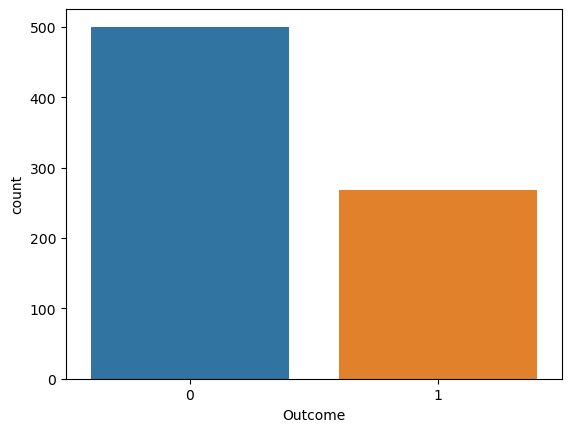

In [238]:
sns.countplot(x = 'Outcome', data = dataset)

In [239]:
dataset['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

<Axes: >

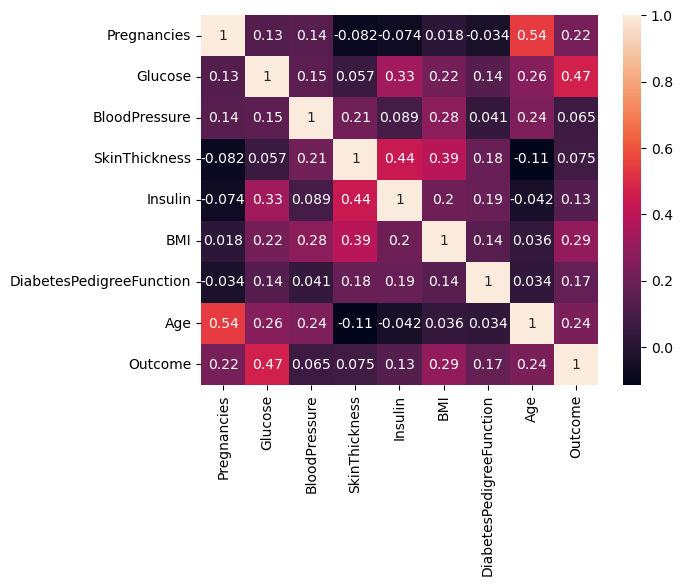

In [240]:
corr_mat = dataset.corr()
sns.heatmap(corr_mat,annot = True)

# DATA CLEANING

In [241]:
dataset.isna().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [242]:
x = dataset.iloc[:,:-1].values
y = dataset.iloc[:,:-1].values

In [243]:
x.shape

(768, 8)

In [244]:
y

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

C:\Users\Aditya Vikram Singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Glucose')

<Figure size 1600x600 with 0 Axes>

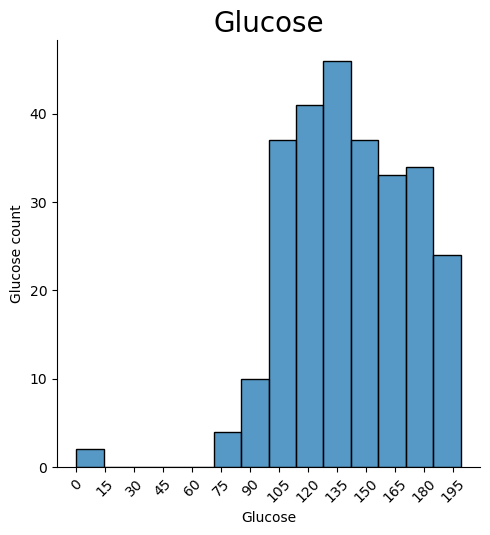

In [245]:
fig = plt.figure(figsize=(16,6))

sns.displot(dataset["Glucose"][dataset["Outcome"] ==1])
plt.xticks([i for i in range(0,201,15)],rotation = 45)
plt.ylabel("Glucose count")
plt.title("Glucose",fontsize = 20)

C:\Users\Aditya Vikram Singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'Insulin')

<Figure size 1600x600 with 0 Axes>

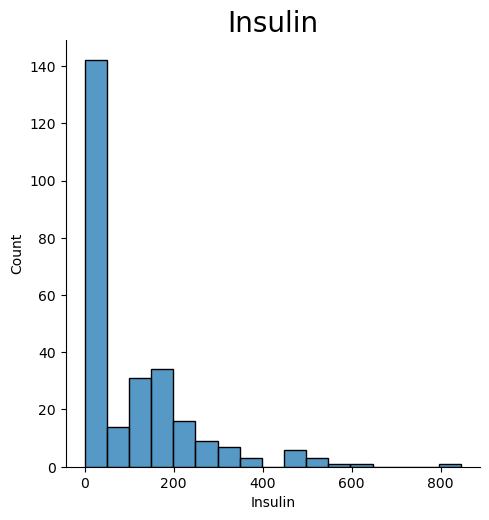

In [246]:
fig = plt.figure(figsize=(16,6))
sns.displot(dataset["Insulin"][dataset["Outcome"]==1])
plt.xticks()
plt.title("Insulin",fontsize=20)

C:\Users\Aditya Vikram Singh\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


Text(0.5, 1.0, 'BMI')

<Figure size 1600x600 with 0 Axes>

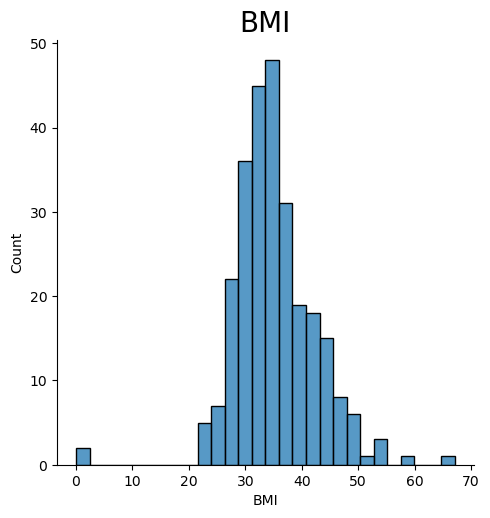

In [247]:
fig = plt.figure(figsize=(16,6))
sns.displot(dataset["BMI"][dataset["Outcome"]==1])
plt.xticks()
plt.title("BMI",fontsize = 20)

In [248]:
y = dataset.iloc[:,-1]

In [249]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.13,random_state=0)

In [250]:
x_train.shape

(668, 8)

In [251]:
x_test.shape

(100, 8)

In [252]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [253]:
x_train

array([[-1.13588314, -0.21193895,  0.55681936, ...,  1.54210011,
        -0.90862605, -0.53625609],
       [-0.54837254, -0.68851622, -0.88387082, ..., -0.94627272,
         0.51775652, -1.03949056],
       [ 0.03913806, -0.33902622,  1.17425801, ...,  0.70417864,
        -0.83578949, -0.28463886],
       ...,
       [ 0.03913806, -0.84737531, -0.21497895, ..., -0.93357694,
        -0.96628832, -1.03949056],
       [ 2.09542514, -1.13332166,  0.24810004, ..., -0.24800483,
        -0.50499013,  0.1347232 ],
       [ 0.33289335,  0.48704104,  0.6597258 , ..., -4.06943453,
         0.52686109,  2.98638518]])

# RANDOM FOREST

In [254]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(n_estimators=100)
clf.fit(x_train,y_train)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [255]:
clf_y_pred = clf.predict(x_test)

<Axes: >

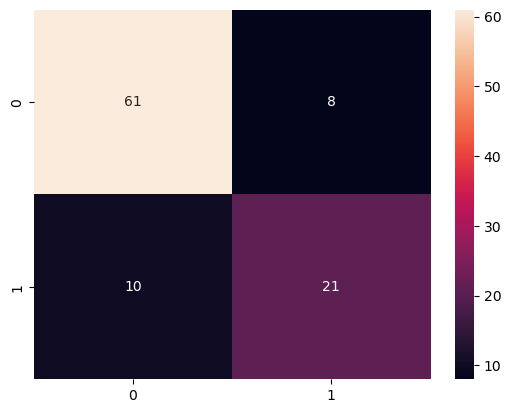

In [256]:
from sklearn.metrics import confusion_matrix
clf_cm = confusion_matrix(y_test,clf_y_pred)
sns.heatmap(clf_cm,annot = True)

In [257]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,clf_y_pred)

0.82

In [258]:
print('Precision of Random Forest is: ',precision_score(y_test,clf_y_pred))

Precision of Random Forest is:  0.7241379310344828


In [259]:
print('Recall of Random Forest is: ',recall_score(y_test,clf_y_pred))

Recall of Random Forest is:  0.6774193548387096


In [260]:
metrics.f1_score(y_test,clf_y_pred)

0.7

# Linear Discriminant Analysis

In [261]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
lda = LinearDiscriminantAnalysis(n_components=1)
lda.fit(x_train,y_train)
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn import metrics

In [262]:
lda_y_pred = lda.predict(x_test)

<Axes: >

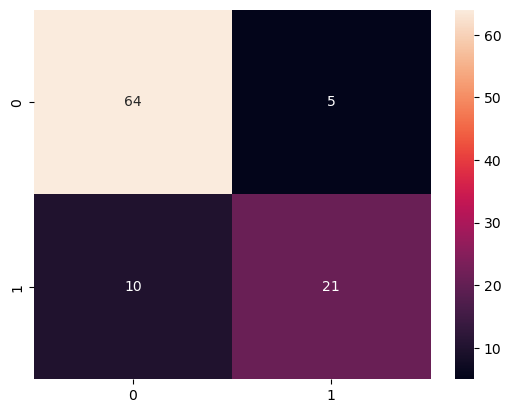

In [263]:
from sklearn.metrics import confusion_matrix
lda_cm = confusion_matrix(y_test,lda_y_pred)
sns.heatmap(lda_cm,annot = True)

In [264]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,lda_y_pred)

0.85

In [265]:
print('Precision of Linear Discriminant Analysis is: ',precision_score(y_test,lda_y_pred))

Precision of Linear Discriminant Analysis is:  0.8076923076923077


In [266]:
print('Recall of Linear Discriminant Analysis is: ',recall_score(y_test,lda_y_pred))

Recall of Linear Discriminant Analysis is:  0.6774193548387096


In [267]:
metrics.f1_score(y_test,lda_y_pred)

0.7368421052631579

In [268]:
from sklearn.metrics import classification_report
print(classification_report(y_test,lda_y_pred))

              precision    recall  f1-score   support

           0       0.86      0.93      0.90        69
           1       0.81      0.68      0.74        31

    accuracy                           0.85       100
   macro avg       0.84      0.80      0.82       100
weighted avg       0.85      0.85      0.85       100



# Naive Bayes

In [269]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB(var_smoothing=0.01)
gnb.fit(x_train,y_train)

GaussianNB(var_smoothing=0.01)

In [270]:
gnb_y_pred = gnb.predict(x_test)

<Axes: >

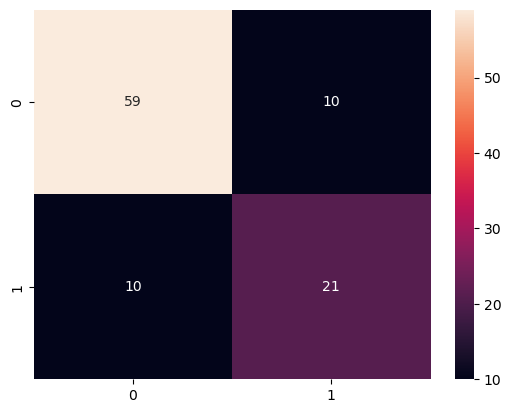

In [271]:
from sklearn.metrics import confusion_matrix
gnb_cm = confusion_matrix(y_test,gnb_y_pred)
sns.heatmap(gnb_cm,annot = True)

In [272]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,gnb_y_pred)

0.8

# XGBoost

In [273]:
import xgboost as xgb
model = xgb.XGBClassifier(
    learning_rate = 0.01,
    n_estimators=2000,
    max_depth=9,
    min_child_weight=2,
    gamma=0.4,
    subsample=0.8,
    colsample_bytree=0.8,
    objective='binary:logistic',
    nthread=-1,
    scale_pos_weight=1)
model.fit(x_train,y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.4, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=9, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=2000, n_jobs=None, nthread=-1,
              num_parallel_tree=None, ...)

In [274]:
xgb_y_pred = model.predict(x_test)

<Axes: >

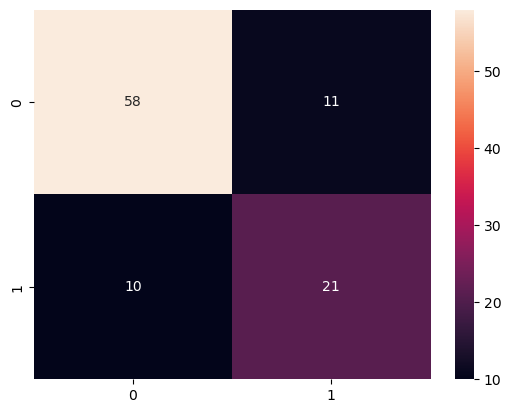

In [275]:
from sklearn.metrics import confusion_matrix
xgb_cm = confusion_matrix(y_test,xgb_y_pred)
sns.heatmap(xgb_cm,annot = True)

In [276]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,xgb_y_pred)

0.79

# NEURAL NETWORKS 

In [277]:
from sklearn.neural_network import MLPClassifier
classifier = MLPClassifier()
classifier.fit(x_train, y_train)
predictions = classifier.predict(x_test)

C:\Users\Aditya Vikram Singh\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


<Axes: >

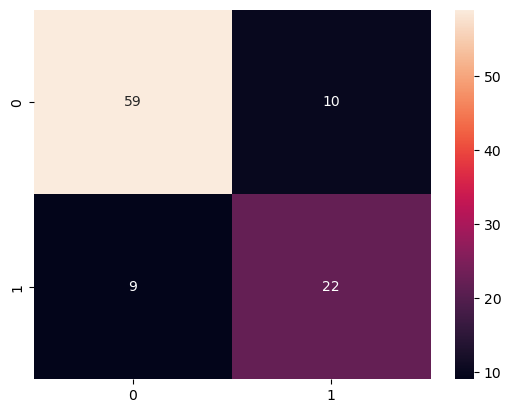

In [278]:
from sklearn.metrics import confusion_matrix
nn_cm = confusion_matrix(y_test,predictions)
sns.heatmap(nn_cm,annot = True)

In [279]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,predictions)

0.81

# DECISION TREE

In [280]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
bagging = BaggingClassifier(DecisionTreeClassifier(random_state=42),n_estimators=500,max_samples=100,bootstrap=True,n_jobs=-1,random_state=42,oob_score=True)
bagging.fit(x_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

In [281]:
BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,random_state=42)

BaggingClassifier(base_estimator=DecisionTreeClassifier(random_state=42),
                  max_samples=100, n_estimators=500, n_jobs=-1, oob_score=True,
                  random_state=42)

<Axes: >

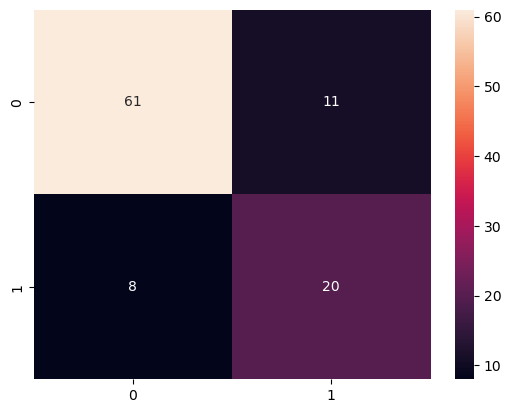

In [282]:
from sklearn.metrics import confusion_matrix
dt_cm = confusion_matrix(bagging.predict(x_test),y_test)
sns.heatmap(dt_cm,annot = True)

In [283]:
from sklearn.metrics import accuracy_score
accuracy_score(bagging.predict(x_test),y_test)

0.81